In [1]:
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [2]:
df_2015 = pd.read_csv("dataset/2015.csv")
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df_2015.info()      # clearly, data has no null values in any cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
df_2015.columns = [x.strip().replace(' ', '_').lower() for x in df_2015.columns]
df_2015.columns

Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'standard_error', 'economy_(gdp_per_capita)', 'family',
       'health_(life_expectancy)', 'freedom', 'trust_(government_corruption)',
       'generosity', 'dystopia_residual'],
      dtype='object')

In [6]:
top_10_2015 = df_2015.sort_values('happiness_rank').head(10)
top_10_2015

,country,region,happiness_rank,happiness_score,standard_error,economy_(gdp_per_capita),family,health_(life_expectancy),freedom,trust_(government_corruption),generosity,dystopia_residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [ ]:
# interactive plot 
import plotly.express as px

fig = px.bar(df_2015.sort_values('happiness_score', ascending=False),
             x='happiness_score', y='country',
             color='region',
             orientation='h',
             title='Happiness Scores by Country (2015)')
fig.update_layout(height=1200)
fig.show()


In [ ]:
# choropleth map - plot scores directly on a world map
fig = px.choropleth(df_2015,
                    locations="country",
                    locationmode="country names",
                    color="happiness_score",
                    hover_name="country",
                    color_continuous_scale="Viridis",
                    title="World Happiness Score (2015)")

fig.update_layout(width=1600, height=800)
fig.show()


<Figure size 640x480 with 0 Axes>

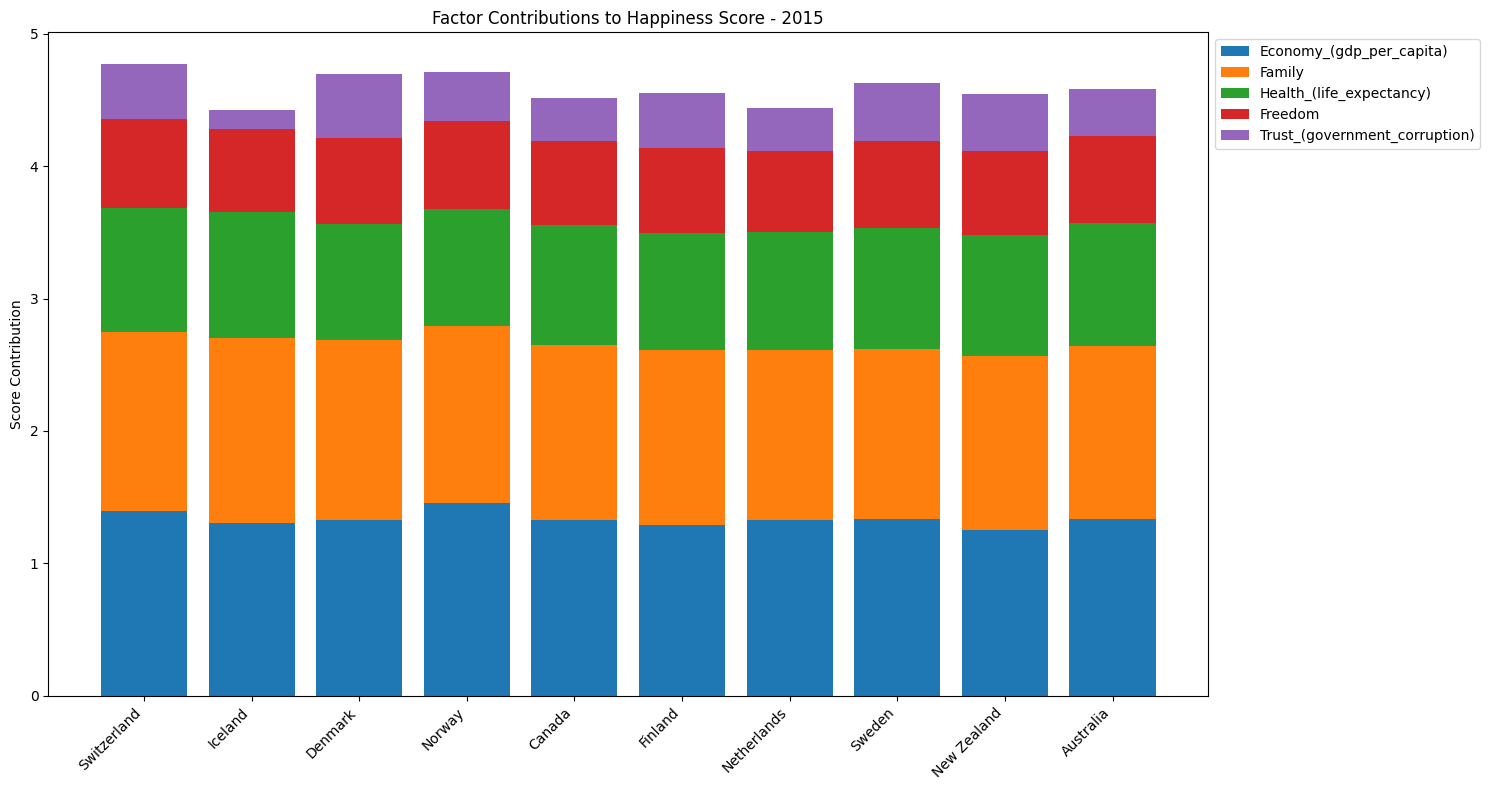

In [25]:
# Stacked bar - contribution of the main factors of the happiness score

components = ['economy_(gdp_per_capita)', 'family', 'health_(life_expectancy)', 'freedom', 'trust_(government_corruption)']
bottom = pd.Series([0]*len(top_10_2015))

plt.figure()
plt.figure(figsize=(15, 8))  # Increase width and height
for comp in components:
    plt.bar(top_10_2015['country'], top_10_2015[comp], bottom=bottom, label=comp.capitalize())
    bottom += top_10_2015[comp]
plt.xticks(rotation=45, ha='right')
plt.ylabel("Score Contribution")
plt.title('Factor Contributions to Happiness Score - 2015')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Places legend outside the plot
plt.tight_layout()
plt.show()
